<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/EDA_FE_FLIGHT_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_excel('flight_price.xlsx')

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
catcol=df.select_dtypes(include='object')

In [11]:
catcol.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### **Source,Destination,Total_Stops,	Additional_Info are imbalanced columns**

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# **only 2 missing rows**

In [13]:
df['Price'].median()

8372.0

<Axes: ylabel='Price'>

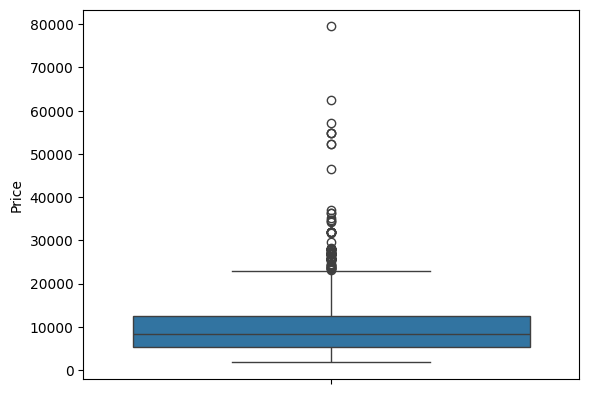

In [14]:
import seaborn as sns
sns.boxplot(df['Price'])

<ipython-input-15-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

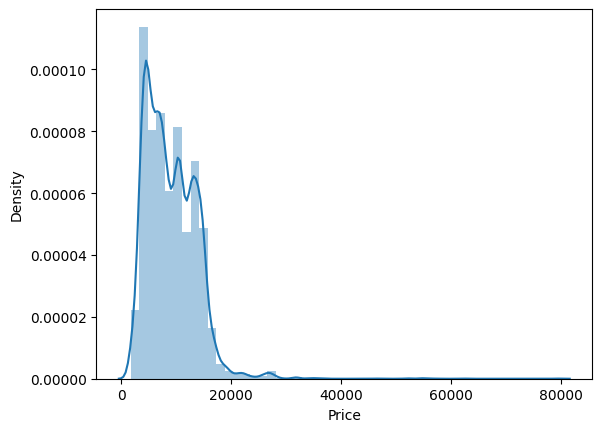

In [15]:
sns.distplot(df['Price'])

# **Final Report**

1)Source,Destination,Total_Stops, Additional_Info are imbalanced columns.

2)only 2 missing rows.

3)Price column contains outliers, but somewhat it follows normal distribution.


In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **Tasks to be done while feature engineering.**


1.   Nullify the problems seen during EDA.
2.   Modify categorical columns to numerical,which will be further used for training and testing.
3. Delete unimportant columns.






In [18]:
# Dropping the null values
df.dropna(inplace=True)

In [19]:
df['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [21]:
# Handling the outliers of column Price
Q1 = 5277.000000
Q3 = 12373.000000

# Step 3: Find minimum and maximum values
IQR = Q3 - Q1
minimum_value = Q1 - 1.5 * IQR
maximum_value = Q3 + 1.5 * IQR
df.loc[df['Price'] > maximum_value, 'Price'] = maximum_value

<Axes: ylabel='Price'>

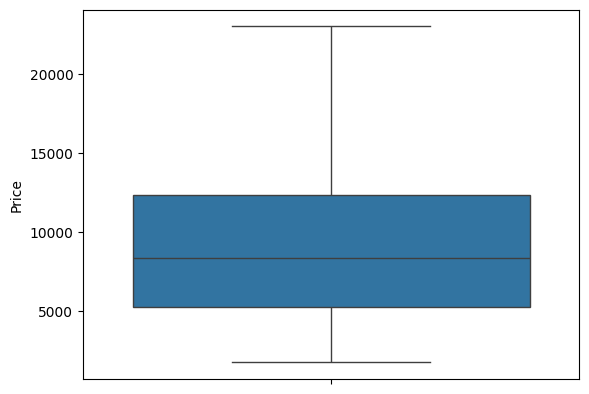

In [22]:
sns.boxplot(df['Price'])

In [23]:
df['Price'].describe()

count    10682.000000
mean      9022.042501
std       4260.560453
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      23017.000000
Name: Price, dtype: float64

In [24]:
df['Price'].median()

8372.0

# **Outliers are handeled**

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
# First handle missing values
df.dropna(inplace=True)

In [31]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [33]:
# Let us separate day,month,year from Date_of_Journey column

df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [34]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [35]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [36]:
# Let us change Dep_Time and Arrival_time
df['Dep_hr']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_min']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [37]:
df.drop('Dep_Time',axis=1,inplace=True)

In [38]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [41]:
# As we had done for Dep Time let us do it same for arrival time
df['Arrival_hr']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)

In [42]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [43]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [61]:
# Let us do it for duration column
df['Duration_hr'] = df['Duration'].str.replace('m', '').str.split('h').str[0].astype(int)
df['Duration_min'] = (
    df['Duration']
    .str.split(' ')
    .apply(lambda x: [item for item in x if item and pd.notna(item)])  # Remove empty strings and NaN values
    .str[1]  # Select the second part after splitting
    .str.split('m')
    .str[0]
    .fillna(0)  # Fill NaN values with 0
    .astype(int)  # Convert to integer
)

In [62]:
df.drop('Duration',axis=1,inplace=True)

In [ ]:
df.head()

In [64]:
df.drop('Route',axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int64 
 7   Month            10682 non-null  int64 
 8   Year             10682 non-null  int64 
 9   Dep_hr           10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hr       10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hr      10682 non-null  int64 
 14  Duration_min     10682 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [66]:
catcol=df.select_dtypes(include='object')

In [67]:
catcol.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682
unique,12,5,6,5,10
top,Jet Airways,Delhi,Cochin,1 stop,No info
freq,3849,4536,4536,5625,8344


In [68]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder=OneHotEncoder()

In [71]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [74]:
encoded=pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [75]:
dfn=pd.concat([df,encoded],axis=1)

In [76]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 9039
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10682 non-null  object 
 1   Source                                     10682 non-null  object 
 2   Destination                                10682 non-null  object 
 3   Total_Stops                                10682 non-null  float64
 4   Additional_Info                            10682 non-null  object 
 5   Price                                      10682 non-null  float64
 6   Date                                       10682 non-null  float64
 7   Month                                      10682 non-null  float64
 8   Year                                       10682 non-null  float64
 9   Dep_hr                                     10682 non-null  float64
 10  Dep_min                     

In [78]:
dfn.drop(columns=['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [79]:
dfn.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9022.042501,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,10.245366,...,0.035667,0.424640,0.268770,0.065250,0.268770,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4260.560453,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,8.494489,...,0.185468,0.494311,0.443341,0.246978,0.443341,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,23017.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# So here we have completed our feature engineering